In [1]:
from point_impl import Point

In [2]:
def gen_id(x, y):
    return (x + y) * (x + y + 1) // 2 + y

In [3]:
class FirstContainer:
    def __init__(self, new_data):
        new_data = [(gen_id(el.x, el.y), el) for el in new_data]
        self.data = new_data
        self.data.sort()
        self.index = 0

    def __repr__(self):
        return f'{self.data}'
        
    def __str__(self):
        return f'Class LabContainer with data={self.data}'

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index][1]

    def __setitem__(self, index, value):
        pass

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == len(self):
            raise StopIteration
        data_to_ret = self.data[self.index][1]
        self.index = self.index + 1
        return data_to_ret

    # from here starts 4 useful methods
    def __delitem__(self, index):
        lst = []
        for i in range(0, len(self)):
            if i != index:
                lst.append(self.data[i])
        self.data = lst

    def __contains__(self, item):
        return True if self.find(item) != len(self) else False
    
    def insert(self, item):
        item = (gen_id(item.x, item.y), item)
        lst = []
        ins = False
        for i in range(0, len(self)):
            if self.data[i][0] < item[0] or ins:
                lst.append(self.data[i])
            else:
                lst.append(item)
                lst.append(self.data[i])
                ins = True
        if not ins:
            lst.append(item)
        self.data = lst

    def find(self, item):
        item = (gen_id(item.x, item.y), item)
        low, high = 0, len(self) - 1
        while(low <= high):
            mid = (low + high) // 2
            if self.data[mid][0] == item[0]:
                return mid
            elif self.data[mid][0] > item[0]:
                high = mid - 1
            elif self.data[mid][0] < item[0]:
                low = mid + 1
        return len(self)

In [4]:
c = FirstContainer([Point(5,6), Point(5,5)])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random

In [28]:
plt.rcParams['figure.figsize'] = [10, 6]

def perform_bench(type_of_bench):
    if type_of_bench == 'insert':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('c.insert(Point({}, {}))'.format(n, n + 1), 
                            setup='c = FirstContainer([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'delete':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('del c[{}]'.format(n - 1), 
                            setup='c = FirstContainer([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'find':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('c.find(Point(0, 1))'.format(''), 
                            setup='c = FirstContainer([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'contains':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('Point(0, 1) in c'.format(''), 
                            setup='c = FirstContainer([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    
    plt.plot(ns, ts, 'or')
    
    degree = 4
    coeffs = np.polyfit(ns, ts, degree)
    p = np.poly1d(coeffs)
    plt.plot(ns, [p(n) for n in ns], '-b')

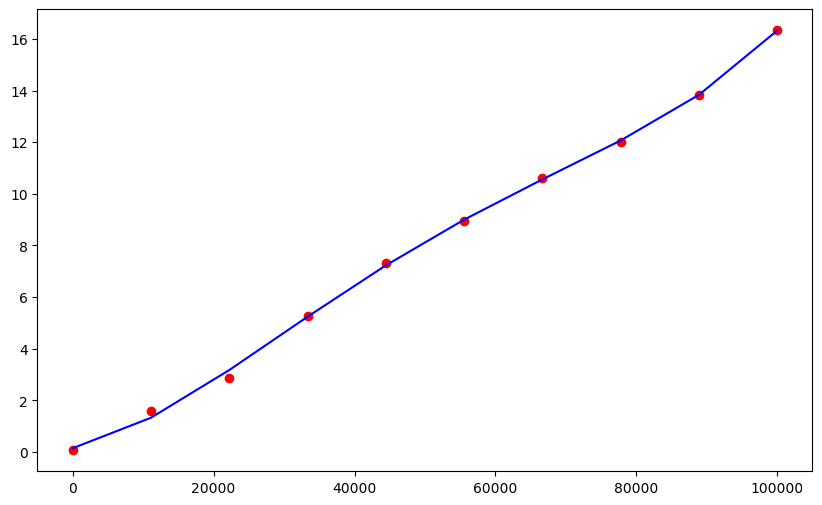

In [22]:
perform_bench('insert')

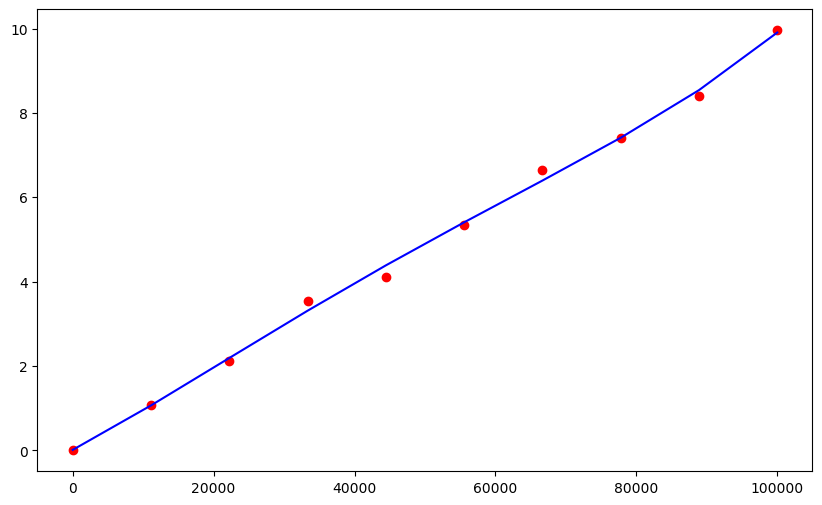

In [24]:
perform_bench('delete')

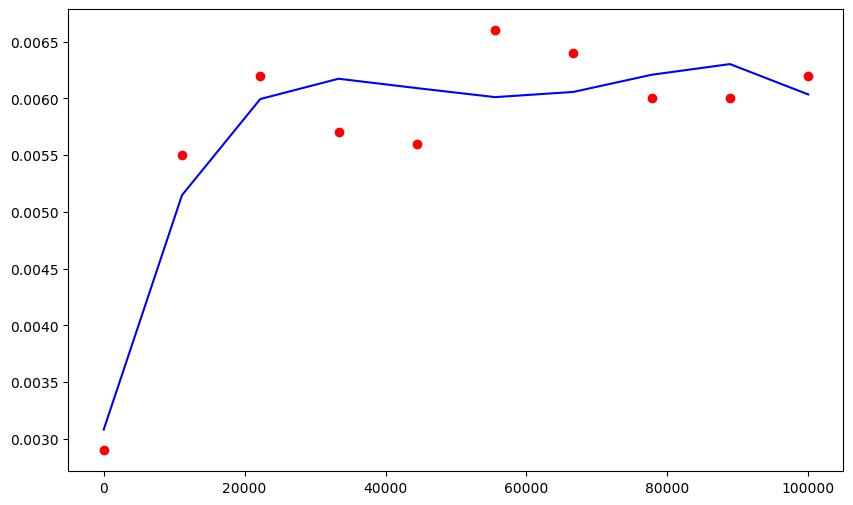

In [33]:
perform_bench('find')

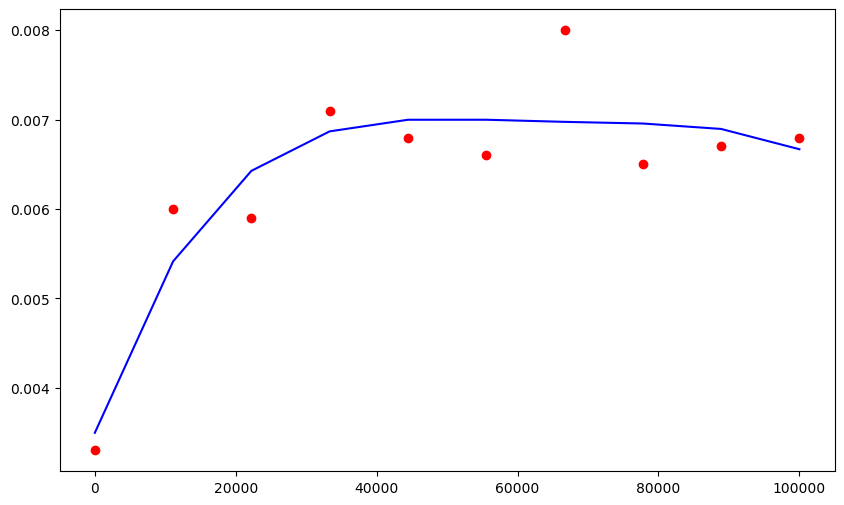

In [36]:
perform_bench('contains')